# Data Frame Avanzado

## Trabajando con Indices

In [1]:
import pandas as pd

In [2]:
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates = ['Date'])

In [3]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [4]:
stocks.reset_index(inplace = True)
stocks.index

RangeIndex(start=0, stop=9, step=1)

In [5]:
stocks.set_index(['Date'], inplace = True)

In [6]:
stocks.index

DatetimeIndex(['2016-10-03', '2016-10-03', '2016-10-03', '2016-10-04',
               '2016-10-04', '2016-10-04', '2016-10-05', '2016-10-05',
               '2016-10-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [7]:
stocks.loc['2016-10-03']

,index,Close,Volume,Symbol
Date,,,,
2016-10-03,0,31.50,14070500,CSCO
2016-10-03,1,112.52,21701800,AAPL
2016-10-03,2,57.42,19189500,MSFT


In [8]:
stocks.loc['20161003']

,index,Close,Volume,Symbol
Date,,,,
2016-10-03,0,31.50,14070500,CSCO
2016-10-03,1,112.52,21701800,AAPL
2016-10-03,2,57.42,19189500,MSFT


In [9]:
stocks.reset_index()

,Date,index,Close,Volume,Symbol
0,2016-10-03,0,31.50,14070500,CSCO
1,2016-10-03,1,112.52,21701800,AAPL
2,2016-10-03,2,57.42,19189500,MSFT
3,2016-10-04,3,113.00,29736800,AAPL
4,2016-10-04,4,57.24,20085900,MSFT
5,2016-10-04,5,31.35,18460400,CSCO
6,2016-10-05,6,57.64,16726400,MSFT
7,2016-10-05,7,31.59,11808600,CSCO
8,2016-10-05,8,113.05,21453100,AAPL


# Merge, Combine, Concat (buscarV :)

In [10]:
dfP = pd.read_excel('data\Siniestros.xlsx', sheet_name = 'Clientes', index_col = 'Cliente')
dfP

,Nombre,Sexo,Fnac
Cliente,,,
35874773,Rafael Harispe,M,1971-02-05
17477171,Silvana Collazo,F,1980-01-01


In [11]:
dfTS = pd.read_excel('data\Siniestros.xlsx', sheet_name = 'TiposSin', index_col = 'Tipo')
dfTS

,Descripcion
Tipo,
A,Accidente
F,Fallecimiento
R,Robo


In [12]:
data = pd.ExcelFile('data\Siniestros.xlsx')

In [13]:
data.sheet_names

['Siniestros', 'MasSiniestros', 'TiposSin', 'Clientes', 'Declaraciones']

In [14]:
dfS = pd.read_excel('data\Siniestros.xlsx', sheet_name = 'Siniestros', index_col = 'NroSiniestro')
dfS2 = pd.read_excel('data\Siniestros.xlsx', sheet_name = 'MasSiniestros', index_col = 'NroSiniestro')

In [15]:
dfS

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,
102030,35874773,2019-01-15,M,150000,150000
453242,17477171,2019-07-03,R,10000,500
123123,35874773,2019-01-15,M,150000,150001


In [16]:
dfS2

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,
123123,35874773,2019-01-15,M,150000,10
678678,17477171,2019-07-03,R,10000,20


## Concat

In [17]:
dfTodos = pd.concat([dfS, dfS2])
dfTodos

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,
102030,35874773,2019-01-15,M,150000,150000
453242,17477171,2019-07-03,R,10000,500
123123,35874773,2019-01-15,M,150000,150001
123123,35874773,2019-01-15,M,150000,10
678678,17477171,2019-07-03,R,10000,20


In [18]:
pd.concat([dfS, dfS2], axis = 1)

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,,,,,,
102030,35874773.0,2019-01-15,M,150000.0,150000.0,NaN,NaT,NaN,NaN,NaN
123123,35874773.0,2019-01-15,M,150000.0,150001.0,35874773.0,2019-01-15,M,150000.0,10.0
453242,17477171.0,2019-07-03,R,10000.0,500.0,NaN,NaT,NaN,NaN,NaN
678678,NaN,NaT,NaN,NaN,NaN,17477171.0,2019-07-03,R,10000.0,20.0


## Merege/Join

#### Referencia

|Merge method | SQL Join Name    | Description                               |
|-------------|------------------|-------------------------------------------|
|left         | LEFT OUTER JOIN  | Use keys from left frame only             |
|right        | RIGHT OUTER JOIN | Use keys from right frame only            |
|outer        | FULL OUTER JOIN  | Use union of keys from both frames        |
|inner        | INNER JOIN       | Use intersection of keys from both frames |

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html


In [112]:
dfP

,Nombre,Sexo,Fnac
Cliente,,,
35874773,Rafael Harispe,M,1971-02-05
17477171,Silvana Collazo,F,1980-01-01


In [138]:
dfPE = dfP.append(pd.Series({'Nombre':'Otro Cliente', 'Sexo':'O', 'Fnac': pd.to_datetime('19710101')}, name ='123123'))

In [139]:
dfPE

,Nombre,Sexo,Fnac
Cliente,,,
35874773,Rafael Harispe,M,1971-02-05
17477171,Silvana Collazo,F,1980-01-01
123123,Otro Cliente,O,1971-01-01


In [141]:
dfTodos.index == 102030

array([ True, False, False, False, False])

In [142]:
dfTodos.loc[dfTodos.index == 102030, 'NroCliente'] = 432343

In [143]:
dfTodos

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,
102030,432343,2019-01-15,M,150000,150000
453242,17477171,2019-07-03,R,10000,500
123123,35874773,2019-01-15,M,150000,150001
123123,35874773,2019-01-15,M,150000,10
678678,17477171,2019-07-03,R,10000,20


In [144]:
dfTodos2 = pd.merge(dfTodos, dfP, left_on = 'NroCliente', right_on = 'Cliente', indicator = True, how = 'inner')
dfTodos2

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago,Nombre,Sexo,Fnac,_merge
0,17477171,2019-07-03,R,10000,500,Silvana Collazo,F,1980-01-01,both
1,17477171,2019-07-03,R,10000,20,Silvana Collazo,F,1980-01-01,both
2,35874773,2019-01-15,M,150000,150001,Rafael Harispe,M,1971-02-05,both
3,35874773,2019-01-15,M,150000,10,Rafael Harispe,M,1971-02-05,both


In [145]:
pd.merge(dfTodos, dfPE, left_on = 'NroCliente', right_on = 'Cliente', indicator = True, how = 'left')

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago,Nombre,Sexo,Fnac,_merge
0,432343,2019-01-15,M,150000,150000,NaN,NaN,NaT,left_only
1,17477171,2019-07-03,R,10000,500,Silvana Collazo,F,1980-01-01,both
2,35874773,2019-01-15,M,150000,150001,Rafael Harispe,M,1971-02-05,both
3,35874773,2019-01-15,M,150000,10,Rafael Harispe,M,1971-02-05,both
4,17477171,2019-07-03,R,10000,20,Silvana Collazo,F,1980-01-01,both


In [146]:
pd.merge(dfTodos, dfPE, left_on = 'NroCliente', right_on = 'Cliente', indicator = True, how = 'right')

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago,Nombre,Sexo,Fnac,_merge
0,17477171,2019-07-03,R,10000.0,500.0,Silvana Collazo,F,1980-01-01,both
1,17477171,2019-07-03,R,10000.0,20.0,Silvana Collazo,F,1980-01-01,both
2,35874773,2019-01-15,M,150000.0,150001.0,Rafael Harispe,M,1971-02-05,both
3,35874773,2019-01-15,M,150000.0,10.0,Rafael Harispe,M,1971-02-05,both
4,NaN,NaT,NaN,NaN,NaN,Otro Cliente,O,1971-01-01,right_only


In [147]:
pd.merge(dfTodos, dfPE, left_on = 'NroCliente', right_on = 'Cliente', indicator = True, how = 'outer')

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago,Nombre,Sexo,Fnac,_merge
0,432343,2019-01-15,M,150000.0,150000.0,NaN,NaN,NaT,left_only
1,17477171,2019-07-03,R,10000.0,500.0,Silvana Collazo,F,1980-01-01,both
2,17477171,2019-07-03,R,10000.0,20.0,Silvana Collazo,F,1980-01-01,both
3,35874773,2019-01-15,M,150000.0,150001.0,Rafael Harispe,M,1971-02-05,both
4,35874773,2019-01-15,M,150000.0,10.0,Rafael Harispe,M,1971-02-05,both
5,NaN,NaT,NaN,NaN,NaN,Otro Cliente,O,1971-01-01,right_only


In [148]:
dfTodos.loc[:, ['MontoReclamado', 'MontoPago']].apply(max, axis = 1)

NroSiniestro
102030    150000
453242     10000
123123    150001
123123    150000
678678     10000
dtype: int64

In [149]:
dfTodos.loc[dfTodos.MontoPago.idxmax()]

,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
NroSiniestro,,,,,
123123,35874773,2019-01-15,M,150000,150001
123123,35874773,2019-01-15,M,150000,10


## Group By y agregaciones

In [24]:
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates = ['Date'])

In [25]:
sgb = stocks.groupby(['Symbol'])

In [26]:
type(sgb)

pandas.core.groupby.generic.DataFrameGroupBy

In [27]:
for g, df in sgb:
    print(g, '->>>')
    print(df)

AAPL ->>>
        Date   Close    Volume Symbol
1 2016-10-03  112.52  21701800   AAPL
3 2016-10-04  113.00  29736800   AAPL
8 2016-10-05  113.05  21453100   AAPL
CSCO ->>>
        Date  Close    Volume Symbol
0 2016-10-03  31.50  14070500   CSCO
5 2016-10-04  31.35  18460400   CSCO
7 2016-10-05  31.59  11808600   CSCO
MSFT ->>>
        Date  Close    Volume Symbol
2 2016-10-03  57.42  19189500   MSFT
4 2016-10-04  57.24  20085900   MSFT
6 2016-10-05  57.64  16726400   MSFT


In [28]:
sgb.groups

{'AAPL': Int64Index([1, 3, 8], dtype='int64'),
 'CSCO': Int64Index([0, 5, 7], dtype='int64'),
 'MSFT': Int64Index([2, 4, 6], dtype='int64')}

In [29]:
sgb.get_group('AAPL')

,Date,Close,Volume,Symbol
1,2016-10-03,112.52,21701800,AAPL
3,2016-10-04,113.00,29736800,AAPL
8,2016-10-05,113.05,21453100,AAPL


In [30]:
sgb = stocks.groupby(['Symbol', 'Date'])

In [31]:
sgb.get_group(('AAPL', '20161003'))

,Date,Close,Volume,Symbol
1,2016-10-03,112.52,21701800,AAPL


### Agregaciones en GroubBy

In [32]:
sgb = stocks.groupby(['Symbol'])

In [33]:
sgb.max()

,Date,Close,Volume
Symbol,,,
AAPL,2016-10-05,113.05,29736800
CSCO,2016-10-05,31.59,18460400
MSFT,2016-10-05,57.64,20085900


In [34]:
sgb.min()

,Date,Close,Volume
Symbol,,,
AAPL,2016-10-03,112.52,21453100
CSCO,2016-10-03,31.35,11808600
MSFT,2016-10-03,57.24,16726400


In [35]:
sgba = sgb.aggregate(['max', 'min', 'mean'])
sgba

Close                        Volume                        
           max     min        mean       max       min          mean
Symbol                                                              
AAPL    113.05  112.52  112.856667  29736800  21453100  2.429723e+07
CSCO     31.59   31.35   31.480000  18460400  11808600  1.477983e+07
MSFT     57.64   57.24   57.433333  20085900  16726400  1.866727e+07

In [36]:
sgba.loc[:, ('Volume', 'max')] > 15000

Symbol
AAPL    True
CSCO    True
MSFT    True
Name: (Volume, max), dtype: bool

In [39]:
sgba.loc[sgba[('Volume', 'max')] > 10]

Close                        Volume                        
           max     min        mean       max       min          mean
Symbol                                                              
AAPL    113.05  112.52  112.856667  29736800  21453100  2.429723e+07
CSCO     31.59   31.35   31.480000  18460400  11808600  1.477983e+07
MSFT     57.64   57.24   57.433333  20085900  16726400  1.866727e+07

In [40]:
stocks.groupby(['Symbol', 'Date']).sum().loc[lambda df:df['Volume']>10]

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [41]:
sgb.describe()

Close                                                                  \
       count        mean       std     min      25%     50%      75%     max   
Symbol                                                                         
AAPL     3.0  112.856667  0.292632  112.52  112.760  113.00  113.025  113.05   
CSCO     3.0   31.480000  0.121244   31.35   31.425   31.50   31.545   31.59   
MSFT     3.0   57.433333  0.200333   57.24   57.330   57.42   57.530   57.64   

       Volume                                                                  \
        count          mean           std         min         25%         50%   
Symbol                                                                          
AAPL      3.0  2.429723e+07  4.712444e+06  21453100.0  21577450.0  21701800.0   
CSCO      3.0  1.477983e+07  3.382156e+06  11808600.0  12939550.0  14070500.0   
MSFT      3.0  1.866727e+07  1.739571e+06  16726400.0  17957950.0  19189500.0   

                                
               75%         max  
Symbol                          
AAPL    25719300.0  29736800.0  
CSCO    16265450.0  18460400.0  
MSFT    19637700.0  20085900.0

In [42]:
grpFrame = sgb.Close.agg(['min', 'max', 'mean'])

In [43]:
grpFrame

,min,max,mean
Symbol,,,
AAPL,112.52,113.05,112.856667
CSCO,31.35,31.59,31.480000
MSFT,57.24,57.64,57.433333


### Pivot Taable, Stack y Unstack

In [162]:
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


In [183]:
pt = stocks.pivot_table(values = ['Close', 'Volume'], index = 'Symbol', columns = 'Date', aggfunc='sum')
pt

Close                           Volume                      
Date   2016-10-03 2016-10-04 2016-10-05 2016-10-03 2016-10-04 2016-10-05
Symbol                                                                  
AAPL       112.52     113.00     113.05   21701800   29736800   21453100
CSCO        31.50      31.35      31.59   14070500   18460400   11808600
MSFT        57.42      57.24      57.64   19189500   20085900   16726400

In [46]:
type(pt)

pandas.core.frame.DataFrame

In [235]:
pt.loc[:,('Close', '2016-10-03')]

,Close
Date,2016-10-03
Symbol,
AAPL,112.52
CSCO,31.50
MSFT,57.42


#### utilzando slice(star, stop, step)
cualquiera de los parametros puede omitrse, en cuyo caso toma valroes por defecto, desde el comienzo, hasta el final, step 1

In [244]:
pt.loc[:,(slice(None), '2016-10-03')]

,Close,Volume
Date,2016-10-03,2016-10-03
Symbol,,
AAPL,112.52,21701800
CSCO,31.50,14070500
MSFT,57.42,19189500


In [243]:
pt.loc[:,('Close', slice('2016-10-03','2016-10-04'))]

Close           
Date   2016-10-03 2016-10-04
Symbol                      
AAPL       112.52     113.00
CSCO        31.50      31.35
MSFT        57.42      57.24

In [174]:
pt.loc['AAPL':'AAPL',('Close', slice(None))]

Close                      
Date   2016-10-03 2016-10-04 2016-10-05
Symbol                                 
AAPL       112.52      113.0     113.05

In [184]:
pt2 = stocks.pivot_table(values = ['Volume'], index = 'Date', columns = 'Symbol')
pt2

Volume                    
Symbol          AAPL      CSCO      MSFT
Date                                    
2016-10-03  21701800  14070500  19189500
2016-10-04  29736800  18460400  20085900
2016-10-05  21453100  11808600  16726400

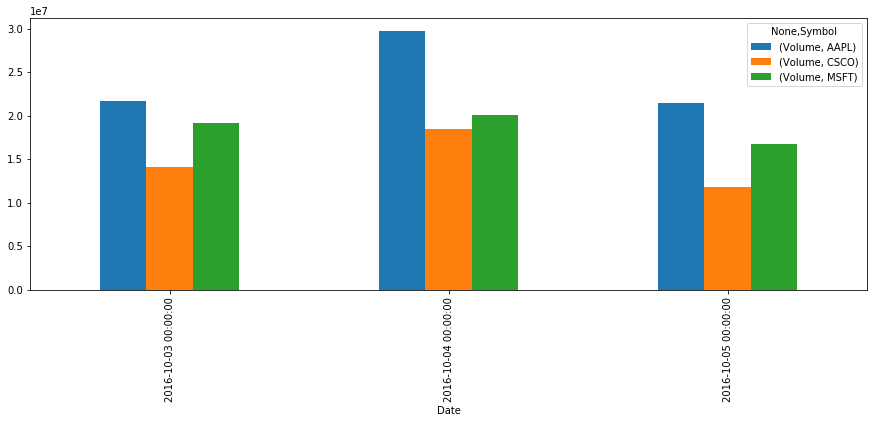

In [186]:
%matplotlib inline

pt2.plot(figsize = (15, 5), kind = 'bar')

In [187]:
pt2 = stocks.pivot_table(values = ['Close', 'Volume'], index = ['Symbol', 'Date'], aggfunc='sum')
pt2

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [53]:
pt2.index

MultiIndex([('AAPL', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('AAPL', '2016-10-05'),
            ('CSCO', '2016-10-03'),
            ('CSCO', '2016-10-04'),
            ('CSCO', '2016-10-05'),
            ('MSFT', '2016-10-03'),
            ('MSFT', '2016-10-04'),
            ('MSFT', '2016-10-05')],
           names=['Symbol', 'Date'])

In [189]:
pt2.unstack(level=0)

Close                  Volume                    
Symbol        AAPL   CSCO   MSFT      AAPL      CSCO      MSFT
Date                                                          
2016-10-03  112.52  31.50  57.42  21701800  14070500  19189500
2016-10-04  113.00  31.35  57.24  29736800  18460400  20085900
2016-10-05  113.05  31.59  57.64  21453100  11808600  16726400

In [190]:
pt3 = pt2.unstack(level=1)
pt3

Close                           Volume                      
Date   2016-10-03 2016-10-04 2016-10-05 2016-10-03 2016-10-04 2016-10-05
Symbol                                                                  
AAPL       112.52     113.00     113.05   21701800   29736800   21453100
CSCO        31.50      31.35      31.59   14070500   18460400   11808600
MSFT        57.42      57.24      57.64   19189500   20085900   16726400

In [193]:
pt3.swaplevel(i = -2, j= -1, axis = 1)
pt3.swaplevel(axis = 1)

Date,2016-10-03,2016-10-04,2016-10-05,2016-10-03,2016-10-04,2016-10-05
,Close,Close,Close,Volume,Volume,Volume
Symbol,,,,,,
AAPL,112.52,113.00,113.05,21701800,29736800,21453100
CSCO,31.50,31.35,31.59,14070500,18460400,11808600
MSFT,57.42,57.24,57.64,19189500,20085900,16726400


In [195]:
pt3.swaplevel(i = 0, j= 1, axis = 1)

Date,2016-10-03,2016-10-04,2016-10-05,2016-10-03,2016-10-04,2016-10-05
,Close,Close,Close,Volume,Volume,Volume
Symbol,,,,,,
AAPL,112.52,113.00,113.05,21701800,29736800,21453100
CSCO,31.50,31.35,31.59,14070500,18460400,11808600
MSFT,57.42,57.24,57.64,19189500,20085900,16726400


# Agrupaciones especiales

### Material de referencia
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [202]:
dfSS = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=True")
dfSS["date"] = pd.to_datetime(dfSS['date'])
dfSS.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [203]:
dfSSI = dfSS.set_index('date')

In [210]:
#dfSSI.resample('M')['ext price'].sum()
dfSSI.resample('2W').sum()

,account number,quantity,unit price,ext price
date,,,,
2014-01-05,9881870,344,1182.08,20613.07
2014-01-19,32061422,1444,3336.80,83207.32
2014-02-02,29420329,1603,3189.10,91202.46
2014-02-16,26071573,1501,3124.27,75677.54
2014-03-02,24376694,1207,3080.70,70718.41
2014-03-16,25577200,1424,3627.34,88905.31
2014-03-30,32376216,1642,3784.84,94869.66
2014-04-13,33176770,1618,3409.92,85916.77
2014-04-27,29555246,1480,3485.37,81037.29


In [214]:
dfSS.set_index('date').groupby('name')["ext price", 'unit price'].resample("1Q").sum()

ext price  unit price
name                            date                             
Barton LLC                      2014-03-31   21909.13     1036.08
                                2014-06-30   32158.10     1320.82
                                2014-09-30   38345.55     1325.81
                                2014-12-31   17025.72      726.35
Cronin, Oberbrunner and Spencer 2014-03-31   26809.63      942.43
...                                               ...         ...
White-Trantow                   2014-12-31   34248.39     1272.59
Will LLC                        2014-03-31   44405.86     1582.58
                                2014-06-30   20371.41     1179.11
                                2014-09-30   16803.35      787.07
                                2014-12-31   22856.98      790.08

[80 rows x 2 columns]

In [218]:
dfSS.groupby(['name','date'])['ext price', 'unit price'].sum()

ext price  unit price
name       date                                      
Barton LLC 2014-01-01 07:21:51    3380.91       86.69
           2014-01-20 01:48:47     156.80       19.60
           2014-01-20 13:27:52      68.06       68.06
           2014-01-21 21:21:01     181.82       90.91
           2014-01-22 16:33:51     608.20       30.41
...                                   ...         ...
Will LLC   2014-12-10 21:19:58    1439.64       46.44
           2014-12-12 13:44:05    1467.45       54.35
           2014-12-12 16:50:59     595.00       35.00
           2014-12-19 01:41:50    2993.40       66.52
           2014-12-31 12:48:35    1764.72       46.44

[1500 rows x 2 columns]

In [220]:
dfSS.groupby(['name', pd.Grouper(key='date', freq='M')])['ext price', 'unit price'].sum()

ext price  unit price
name       date                             
Barton LLC 2014-01-31    6177.57      422.30
           2014-02-28   12218.03      456.42
           2014-03-31    3513.53      157.36
           2014-04-30   11474.20      494.00
           2014-05-31   10220.17      413.29
...                          ...         ...
Will LLC   2014-08-31    1439.82      134.44
           2014-09-30    4345.99      184.69
           2014-10-31    7085.33      299.15
           2014-11-30    3210.44      148.68
           2014-12-31   12561.21      342.25

[240 rows x 2 columns]

In [ ]:
dfSS.groupby(['name', pd.Grouper(key='date', freq='A-DEC')]) \
    ['ext price', 'unit price', 'quantity']. \
    agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean']})

----------------------------

In [221]:
urDF = pd.read_csv('http://bit.ly/uforeports', parse_dates = ['Time'])
urDF.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [222]:
urDF.set_index(['Time', 'State'], inplace = True)

In [224]:
urDF.loc[urDF.index.get_level_values(0) > '1980-01-01','City'] \
    .groupby(
    [pd.Grouper(level = 'Time', freq = '10Y'), pd.Grouper(level = 'State')])\
    .count()

Time        State
1980-12-31  AK          1
            AL          4
            AR          3
            AZ          4
            CA         34
                     ... 
2000-12-31  VT         24
            WA       1081
            WI        238
            WV         74
            WY         45
Name: City, Length: 146, dtype: int64

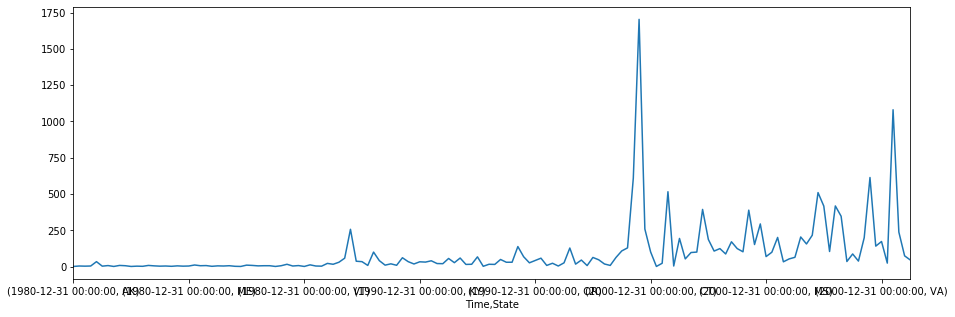

In [225]:
urDF.loc[urDF.index.get_level_values(0) > '1980-01-01','City'] \
    .groupby(
    [pd.Grouper(level = 'Time', freq = '10Y'), pd.Grouper(level = 'State')])\
    .count().plot(figsize = (15,5))

In [226]:
urDF.pivot_table(index = 'Time', aggfunc = 'count')

,City,Colors Reported,Shape Reported
Time,,,
1930-06-01 22:00:00,1,0,1
1930-06-30 20:00:00,1,0,1
1931-02-15 14:00:00,1,0,1
1931-06-01 13:00:00,1,0,1
1933-04-18 19:00:00,1,0,1
...,...,...,...
2000-12-31 21:00:00,1,1,1
2000-12-31 22:00:00,1,0,1
2000-12-31 23:00:00,3,0,2


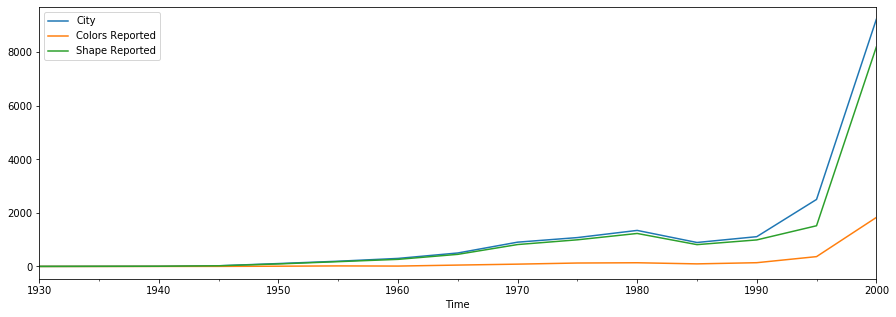

In [227]:
urDF.pivot_table(index = pd.Grouper(level = 'Time', freq = '5Y'), aggfunc = 'count').plot(figsize = (15,5))

### Empaquetando funciones

In [228]:
%load_ext autoreload
%autoreload 2
import siniestros_util as su

In [229]:
su.data_frame_siniestros()

,Nombre,Sexo,FechaNacimiento
Cliente,,,
35874773,Rafael Harispe,M,1971-02-05
17477171,Silvana Collazo,F,1980-01-01


---------------------------------------
# Y ahora te toca a ti !!

## Objetivo Primario
* Realziar un primer ciclo donde las partes ajerciten los roles específicos necesarios
* Indentificar alcance mínimo y máximo en relacionado a gestion de información

## Proximos pasos
* Definir Plan de activos a generar (notebooks, KPIs, data Inventory), y organizar en sprints (quien hace de Scrum Master?)
    * **Priorizar**
    * Definir por área y responsables
* Gestion de equipo y Sitio de Gobierno https://zurichsantanderuy.atlassian.net/wiki/spaces/ZDGU/overview
    * Definir reportes y documentarlos (Identificar Consumers)
    * Identiticar y formalizar fuentes de informacion (Owner y Consumers)
    * Identificar productores de informacion y formalizarlo
* Gobernar la evolucion 
    * Repositorio de activos con trazabildiad https://bitbucket.org/zurichsantanderuy/governance/src/master/
    * Confluence y BitBucket con indicador de colaboradores
* Definir formas de medicoin de la colaboracion, seguimiento y incentivos
* Definir mecanimso e instancias de colaboracion entre las partes (KB, reunion semanal, youtube)

-------------------------
### Gobierno de activos bitbucket
![title](seguimientobb.png)

--------------------------------------
## Premio al que me alcance primero
![title](contributorsbb2.png)

----------------------------------
## Gobierno de la documentacion
![title](colaboradores.png)

----------------------------------------------------
# Repasando
![title](slide0.png)

----------------------------------------------------
![title](slide1.png)

----------------------------------------------------
![title](slide2.png)

----------------------------------------------------
----------------------------------------------------
# Perspectiva de Riesgo!
![title](DGF1.jpg)

----------------------------------------------------
![title](DGF2.jpg)